<a href="https://colab.research.google.com/github/Abhishek-M-B/DSA_Assignments/blob/main/Car_Price_Prediction_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car_df = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/car_prediction_data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print(car_df.info())
print(car_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

# Preprocessing

In [ ]:
car_df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car_df.duplicated().sum()

np.int64(2)

In [ ]:
car_df.drop_duplicates(inplace=True)

## Outlier Detection -- IQR

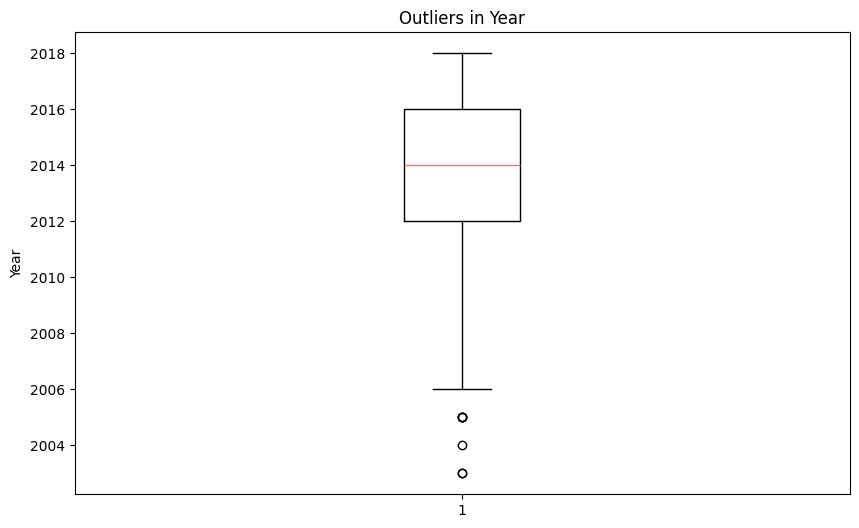

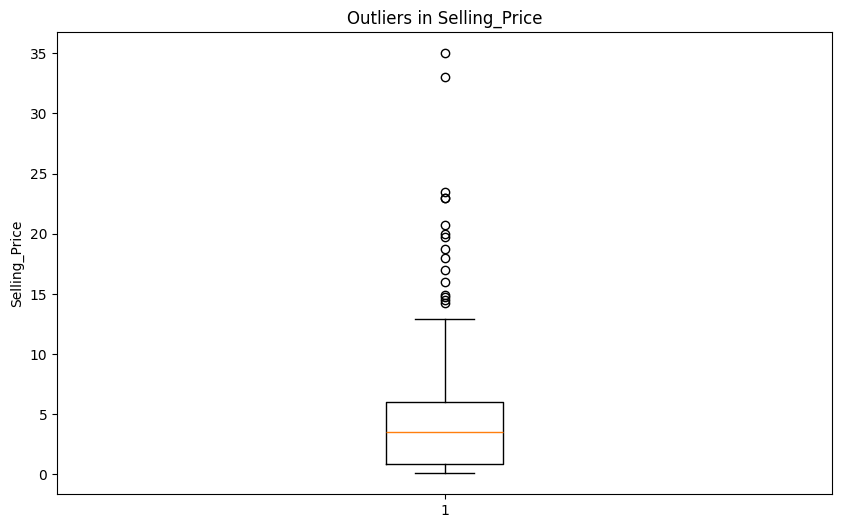

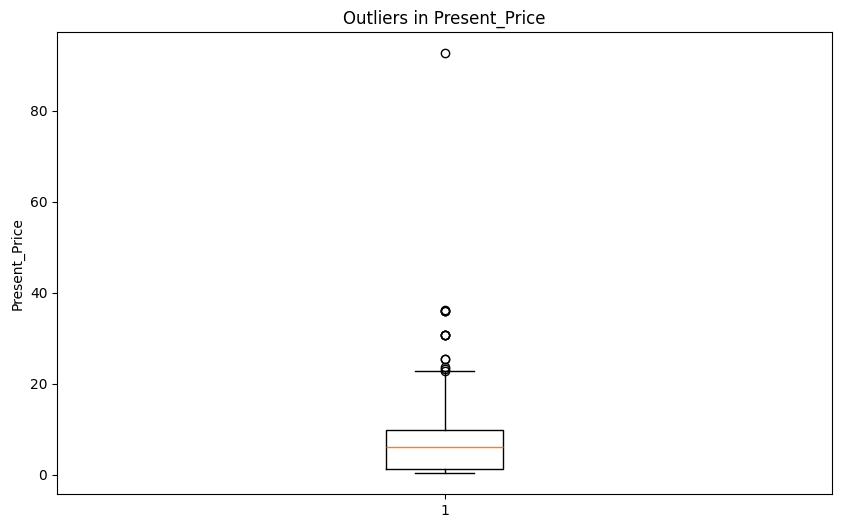

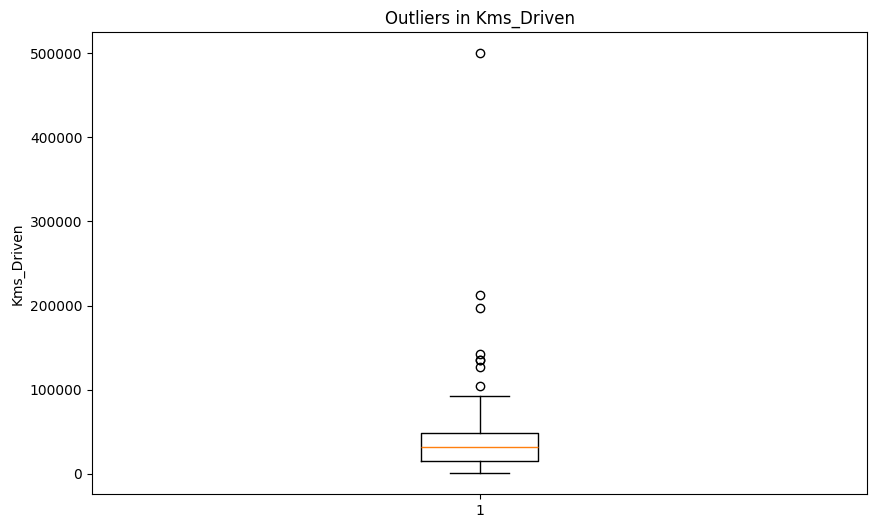

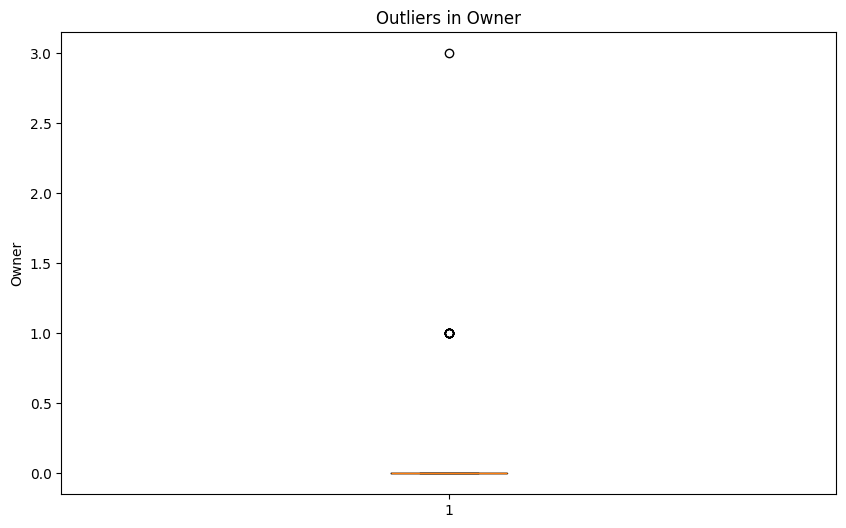

In [ ]:
num_cols = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

for col in num_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(car_df[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
for col in num_cols:
    Q1 = car_df[col].quantile(0.25)
    Q3 = car_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    car_df = car_df[(car_df[col] >= lower) & (car_df[col] <= upper)]

<Axes: >

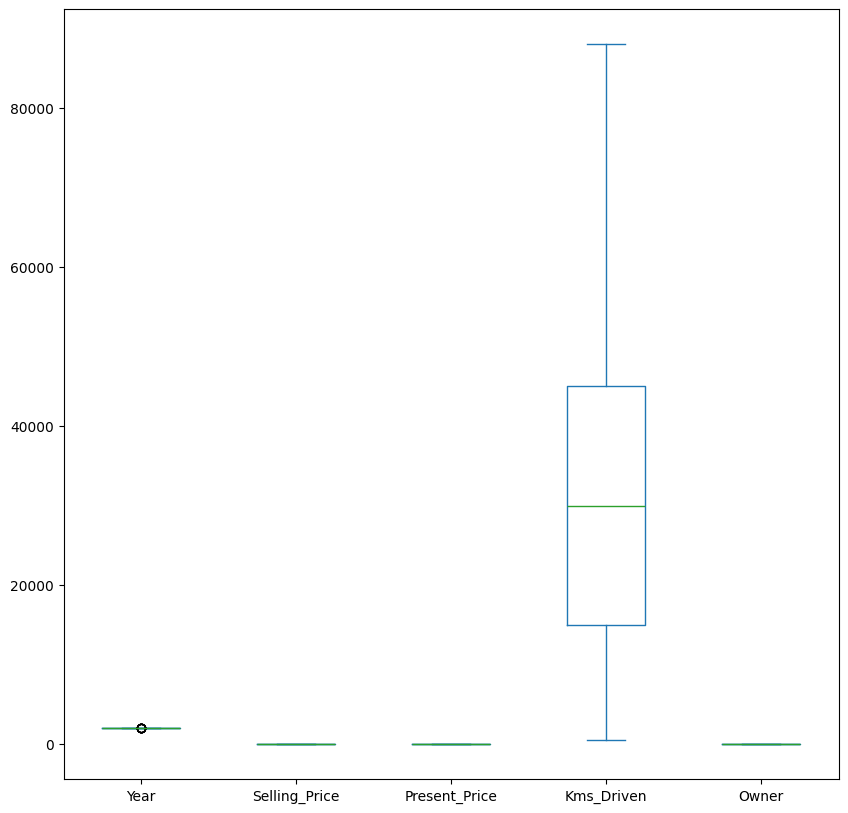

In [ ]:
car_df.plot(kind='box',figsize=(10,10))

In [ ]:
car_df.nunique()

,0
Car_Name,89
Year,13
Selling_Price,134
Present_Price,128
Kms_Driven,188
Fuel_Type,3
Seller_Type,2
Transmission,2
Owner,1


# Encoding

In [ ]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
num_cols = ['Present_Price', 'Kms_Driven', 'Year', 'Owner']

#Drop car_name column due to distinct unique names
car_df.drop('Car_Name', axis=1, inplace=True)

# OneHotEncoding
car_df_copy = pd.get_dummies(car_df, columns=cat_cols, drop_first=True)

# Train-Test Splitting

In [ ]:
X = car_df_copy.drop('Selling_Price', axis=1)
y = car_df_copy['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.columns.tolist())

['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


# Scailing

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Model Selection

In [ ]:
# LinearRegression

# Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluation
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8640604382450653
MAE: 0.8341203968613691
MSE: 1.2781176351077084


In [ ]:
# ExtraTreesRegressor

# Model Training
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Evaluation
y_pred = et_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9337786644054323
MAE: 0.436873076923078
MSE: 0.6226197565384621


In [ ]:
# RandomForestRegressor

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluation
y_pred = rf_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9535225455468302
MAE: 0.41853461538461534
MSE: 0.43698577076923073


# Hyperparameter tuning the best model

In [ ]:
random_grid = {
    'n_estimators': [100, 300, 500, 800, 1000, 1200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

rf_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter=10,
                               cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", rf_random.best_params_)
print("Tuned R2 Score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Tuned R2 Score: 0.9234296937946664


In [ ]:
# To see the first 5 rows of your numpy array
print(X_train[:5])

[[-1.24206852 -0.24591729  1.14860532  0.         -0.44979122  0.46516048
  -0.72760688  0.31706324]
 [ 0.4247073  -1.1422983  -0.83695277  0.         -0.44979122  0.46516048
   1.37436854  0.31706324]
 [-1.24206852 -1.08336383 -1.23208871  0.         -0.44979122  0.46516048
   1.37436854  0.31706324]
 [ 0.00801335 -1.04956923 -0.29364086  0.         -0.44979122  0.46516048
   1.37436854  0.31706324]
 [ 0.84140126  0.49797591 -0.78464665  0.         -0.44979122  0.46516048
  -0.72760688 -3.1539449 ]]


In [ ]:
import pickle

# wb -- Write Binary
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(ss, file)

print("Model successfully saved!")

Model successfully saved!
